In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
import sklearn.metrics as metrics
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
books = pd.read_csv('../Data/Books/Books.csv',low_memory=False, sep=',', encoding="latin-1", error_bad_lines=False)
users = pd.read_csv('../Data/Books/Users.csv',low_memory=False, sep=',', encoding="latin-1", error_bad_lines=False)
ratings = pd.read_csv('../Data/Books/Ratings.csv',low_memory=False, sep=',', encoding="latin-1", error_bad_lines=False)

## Books

In [3]:
print (books.shape)
books.head(10)

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [4]:
books = books.rename(columns = {'Book-Title':'bookTitle', 'Book-Author':'bookAuthor' , 'Year-Of-Publication':'yearOfPublication', 'Publisher':'publisher', 'Image-URL-S':'imageUrlS', 'Image-URL-M':'imageUrlM', 'Image-URL-L':'imageUrl'})

In [5]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrlM            0
imageUrl             3
dtype: int64

In [6]:
books.loc[books.imageUrl.isnull()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrl
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [7]:
books['imageUrl'] = books['imageUrl'].fillna(books['imageUrlM'])

In [8]:
books.drop(['imageUrlS','imageUrlM'],axis=1,inplace=True)
books.head(1)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...


In [9]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
imageUrl             object
dtype: object

In [10]:
pd.set_option('display.max_colwidth', None)
books.yearOfPublication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [11]:
books.loc[books.yearOfPublication == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg


In [12]:
books.loc[books.ISBN == '078946697X', 'yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X', 'bookAuthor'] = 'Michael Teitelbaum'
books.loc[books.ISBN == '078946697X', 'publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '078946697X', 'bookTitle'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [13]:
books.loc[books.ISBN == '0789466953', 'yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953', 'bookAuthor'] = 'James Buckley'
books.loc[books.ISBN == '0789466953', 'publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '0789466953', 'bookTitle'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [14]:
books.loc[books.bookTitle == 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg


In [15]:
books.loc[books.yearOfPublication == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?ÃÂ©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg


In [16]:
books.loc[books.ISBN == '2070426769', 'yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769', 'bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769', 'publisher'] = 'Gallimard'
books.loc[books.ISBN == '2070426769', 'bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

In [17]:
books.loc[books.ISBN == '2070426769']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg


In [18]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication, errors='raise')

In [19]:
print(sorted(books.yearOfPublication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [20]:
books.loc[(books.yearOfPublication>2020) | (books.yearOfPublication == 0), 'yearOfPublication'] = np.NAN
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)
books.yearOfPublication = books.yearOfPublication.astype(np.int32)

In [21]:
books.loc[books.publisher.isnull()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [22]:
books.loc[books.ISBN == '193169656X', 'publisher'] = 'others'
books.loc[books.ISBN == '1931696993', 'publisher'] = 'others'

In [23]:
books.loc[books.publisher == 'others']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,others,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,others,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [24]:
books.loc[books.bookAuthor.isnull()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [25]:
books.loc[books.ISBN == '9627982032', 'bookAuthor'] = 'others'

In [26]:
books.loc[books.bookAuthor == 'others']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,others,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


## Users

In [27]:
print (users.shape)
users.head(10)

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [28]:
users = users.rename(columns = {'User-ID':'userId', 'Location':'location' , 'Age':'age'})

In [29]:
users.dtypes

userId        int64
location     object
age         float64
dtype: object

In [30]:
users.userId.values

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [31]:
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [32]:
users.loc[(users.age > 90) | (users.age < 5), 'age'] = np.NAN
users.age = users.age.fillna(users.age.mean())
users.age = users.age.astype(np.int32)

In [33]:
print(sorted(users.age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Ratings

In [34]:
ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [35]:
ratings = ratings.rename(columns = {'User-ID':'userId', 'ISBN':'ISBN' , 'Book-Rating':'bookRating'})

In [36]:
ratings.dtypes

userId         int64
ISBN          object
bookRating     int64
dtype: object

In [ ]:
print (ratings.shape)

In [37]:
ratings = ratings[ratings.ISBN.isin(books.ISBN)]
ratings = ratings[ratings.userId.isin(users.userId)]

In [38]:
print (ratings.shape)

(1149780, 3)
(1031136, 3)


In [39]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [40]:
ratings.bookRating = ratings.bookRating.astype(np.int32)

In [41]:
ratings.dtypes

userId         int64
ISBN          object
bookRating     int32
dtype: object

In [42]:
ratings_explicit = ratings[ratings.bookRating != 0]
ratings_implicit = ratings[ratings.bookRating == 0]

In [43]:
users_exp_rat = users[users.userId.isin(ratings_explicit.userId)]
users_imp_rat = users[users.userId.isin(ratings_implicit.userId)]

In [44]:
print (ratings_explicit.shape)
print (ratings_implicit.shape)
print (users_exp_rat.shape)
print (users_imp_rat.shape)

(383842, 3)
(647294, 3)
(68091, 3)
(52451, 3)


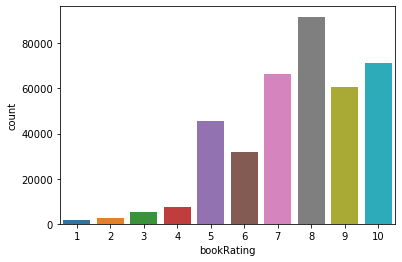

In [45]:
sns.countplot(data=ratings_explicit, x='bookRating')
plt.show()

## Populatrity Based

In [46]:
def top_popular():
    ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
    top10 = ratings_count.sort_values('bookRating', ascending=False).head(10)
    print ("Following are the top 10 books based on Popularity")
    top10 = top10.merge(books, left_index=True, right_on='ISBN')
    
    return top10

top_popular()

Following are the top 10 books based on Popularity


,bookRating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.01.LZZZZZZZ.jpg
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.01.LZZZZZZZ.jpg
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.01.LZZZZZZZ.jpg


## Collaborative Filtering

In [47]:
countU = ratings_explicit['userId'].value_counts()
ratings_exp = ratings_explicit[ratings_explicit['userId'].isin(countU[countU >= 5].index)]
print (ratings_exp.shape)
countR = ratings_explicit['ISBN'].value_counts()
ratings_exp = ratings_exp[ratings_exp['ISBN'].isin(countR[countR >= 5].index)]
print (ratings_exp.shape)

(302218, 3)
(145890, 3)


In [48]:
rating_matrix = ratings_exp.pivot(index='userId', columns='ISBN', values='bookRating')
userId = rating_matrix.index
ISBN = rating_matrix.columns
print (rating_matrix.shape)
rating_matrix.head(10)

(12293, 13769)


ISBN,0002005018,0002251760,0002259834,0002558122,0003300277,0006385427,0006471641,0006480764,000648302X,0006485200,...,950491036X,9580464162,958704049X,9681500555,9681500830,968150108X,9681501225,9722105248,9726101794,9871138148
userId,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
rating_matrix.fillna(0, inplace=True)
rating_matrix = rating_matrix.astype(np.int32)

In [50]:
global metric, k, algo
k = 10
metric = 'cosine'
algo = 'brute'

In [51]:
user_model = NearestNeighbors(metric=metric, algorithm=algo)
user_model.fit(rating_matrix)

rating_matrix_transpose = rating_matrix.T
book_model = NearestNeighbors(metric=metric, algorithm=algo)
book_model.fit(rating_matrix_transpose)

NearestNeighbors(algorithm='brute', metric='cosine')

In [52]:
def findSimilarUsers(user_id, k=k):
    similarities = []
    indices = []
    loc = rating_matrix.index.get_loc(user_id)
    distances, indices = user_model.kneighbors(rating_matrix.iloc[loc, : ].values.reshape(1,-1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    
    return similarities, indices.flatten()

In [53]:
def predict_userBased(user_id, item_id, k=k):
    prediction = 0
    user_loc = rating_matrix.index.get_loc(user_id)
    item_loc = rating_matrix.columns.get_loc(item_id)
    similarities, indices = findSimilarUsers(user_id, k)
    sum_wt = np.sum(similarities) - 1
    wtd_sum = 0
    
    for i in range(0, len(indices)):
        if indices[i] == user_loc:
            continue;
        else:
            product = rating_matrix.iloc[indices[i], item_loc] * (similarities[i])
            wtd_sum = wtd_sum + product
            
    prediction = (wtd_sum/sum_wt)
                
#     print ("UserBased {} -> Item {} : {}".format(user_id, item_id, prediction))
    return prediction

In [54]:
def findSimilarItems(item_id, k=k):
    similarities = []
    indices = []
    loc = rating_matrix_transpose.index.get_loc(item_id)
    distances, indices = book_model.kneighbors(rating_matrix_transpose.iloc[loc, : ].values.reshape(1, -1), n_neighbors=k+1)
    similarities = 1-distances.flatten()
    
    return similarities, indices.flatten()

In [55]:
def predict_itemBased(user_id, item_id, k=k):
    prediction = 0
    wtd_sum = 0
    user_loc = rating_matrix.index.get_loc(user_id)
    item_loc = rating_matrix.columns.get_loc(item_id)
    similarities, indices = findSimilarItems(item_id, k)
    sum_wt = np.sum(similarities) - 1
    product = 1
    
    for i in range(0, len(indices)):
        if indices[i] == item_loc:
            continue;
        else:
            product = rating_matrix.iloc[user_loc, indices[i]] * (similarities[i])
            wtd_sum = wtd_sum + product
            
    prediction = (wtd_sum/sum_wt)
        
#     print ("User {} -> ItemBased {} : {}".format(user_id, item_id, prediction))            
    return prediction

In [78]:
def recommend(user_id, approach):
    ids = ['User-based', 'Item-based']

    if (user_id not in rating_matrix.index.values) or type(user_id) is not int:
        print ("User id should be a valid integer from this list :\n\n {}".format(re.sub('[\[\]]','',np.array_str(rating_matrix.index.values))))
    elif ((approach < 0) or (approach > 1)):
        print ("Valid values for Approach :")
        for i in range (0,len(ids)):
            print ("{} for {}".format(i,ids[i]))
    else:
        prediction = []  
        if (approach == 0):
            for i in range(rating_matrix.shape[1]):
                if (rating_matrix[str(rating_matrix.columns[i])][user_id] !=0):
                    prediction.append(predict_userBased(user_id, str(rating_matrix.columns[i])))
                else:                    
                    prediction.append(-1000)
        else:
            for i in range(rating_matrix.shape[1]):
                if (rating_matrix[str(rating_matrix.columns[i])][user_id] !=0):
                    prediction.append(predict_itemBased(user_id, str(rating_matrix.columns[i])))
                else:                    
                    prediction.append(-1000)
        prediction = pd.Series(prediction)
        prediction = prediction.sort_values(ascending=False)
        recommended = prediction[:10]
        
        print ("As per {} approach....Following books are recommended...".format(ids[approach]))
        for i in range(len(recommended)):
#              print ("{}. {}".format(i+1,books.bookTitle[recommended.index[i]]))
            print ("{}. {}".format(i+1,books.bookTitle[books.ISBN == rating_matrix.columns[recommended.index[i]]]))

In [76]:
def similar_books(book, approach):
    ids = ['ISBN']
    
    if ((approach < 0) or (approach > 1)):
        print ("Valid values for Approach :")
        for i in range (0,len(ids)):
            print ("{} for {}".format(i,ids[i]))
    elif (book not in rating_matrix.columns.values) or type(book) is not str:
        print ("Book should be a valid String from the list : \n\n {}".format(re.sub('[\[\]]','',np.array_str(rating_matrix.columns.values))))
    else:
        similarities, indices = findSimilarItems(book,10)
        
        print ("Following are the similar books to {}\n".format(books.bookTitle[books.ISBN == book]))
        book_number = 1
        for i in range (0,len(indices)):
            if indices[i] == rating_matrix.columns.get_loc(book):
                continue;
            else:
                print ("{}. {}".format(book_number,books.bookTitle[books.ISBN == rating_matrix.columns[indices[i]]]))
                book_number += 1

In [77]:
similar_books('059035342X', 0)

Following are the similar books to 2143    Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Name: bookTitle, dtype: object

1. 3459    Harry Potter and the Chamber of Secrets (Book 2)
Name: bookTitle, dtype: object
2. 6330    Harry Potter and the Prisoner of Azkaban (Book 3)
Name: bookTitle, dtype: object
3. 5431    Harry Potter and the Goblet of Fire (Book 4)
Name: bookTitle, dtype: object
4. 6932    Harry Potter and the Goblet of Fire (Book 4)
Name: bookTitle, dtype: object
5. 5506    Harry Potter and the Order of the Phoenix (Book 5)
Name: bookTitle, dtype: object
6. 3839    Harry Potter and the Prisoner of Azkaban (Book 3)
Name: bookTitle, dtype: object
7. 5432    Harry Potter and the Chamber of Secrets (Book 2)
Name: bookTitle, dtype: object
8. 47261    Lover Beware
Name: bookTitle, dtype: object
9. 41319    Free Drinks for Ladies With Nuts: Delightfully Mangled English from Around the World
Name: bookTitle, dtype: object
10. 6862    Fried Green Tomatoes at the Whi

In [61]:
books.loc[books.bookTitle == 'Good in Bed']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrl
1496,0743418174,Good in Bed,Jennifer Weiner,2002,Washington Square Press,http://images.amazon.com/images/P/0743418174.01.LZZZZZZZ.jpg
9265,0743418166,Good in Bed,Jennifer Weiner,2001,Atria,http://images.amazon.com/images/P/0743418166.01.LZZZZZZZ.jpg


In [79]:
recommend(89602, 0)

12343    5.586722
12331    3.320501
12332    3.267714
2186     2.988323
3468     2.872336
1496     2.842264
465      2.808413
11078    2.784137
4147     2.769211
554      2.759889
dtype: float64
As per User-based approach....Following books are recommended...
1. 1406    The No. 1 Ladies' Detective Agency (Today Show Book Club #8)
Name: bookTitle, dtype: object
2. 5579    Tears of the Giraffe (No.1 Ladies Detective Agency)
Name: bookTitle, dtype: object
3. 6791    Morality for Beautiful Girls (No.1 Ladies Detective Agency)
Name: bookTitle, dtype: object
4. 408    The Lovely Bones: A Novel
Name: bookTitle, dtype: object
5. 479    Empire Falls
Name: bookTitle, dtype: object
6. 356    The Secret Life of Bees
Name: bookTitle, dtype: object
7. 1485    Bel Canto: A Novel
Name: bookTitle, dtype: object
8. 4036    Under the Tuscan Sun
Name: bookTitle, dtype: object
9. 1398    Cold Sassy Tree
Name: bookTitle, dtype: object
10. 245    Wicked: The Life and Times of the Wicked Witch of the West
Nam

In [60]:
# 1. Parable of the Talents
# 2. Fear: A Novel (The X-Files , No 7)
# 3. The Rising
# 4. Cabal/an Aurelio Zen Mystery
# 5. As You Like It (New Penguin Shakespeare S.)
# 6. Doctor Sax: Faust Part Three
# 7. The Murder Book
# 8. The Black Echo
# 9. The Cry of the Halidon
# 10. Chicken Soup for the Parent's Soul : 101 Stories of Loving, Learning and Parenting (Chicken Soup for the Soul (Paper))

In [ ]:
# As per User-based approach....Following books are recommended...
# 1. Stacey's Emergency (Baby-Sitters Club, 43)
# 2. The Cry of the Halidon
# 3. The Black Echo
# 4. A Connecticut Yankee in King Arthur's Court
# 5. Horse Play (Saddle Club (Paperback))
# 6. Good in Bed
# 7. Black Beauty (Great Illustrated Classics (Playmore))
# 8. Bar Sport
# 9. Rights of Man (Classics S.)
# 10. Like a Hole in the Head